In [1]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2

# DAMLAS - Machine Learning At Scale
## Assignment - HW4
Data Analytics and Machine Learning at Scale
Target, Minneapolis

---
__Name:__  *Your Name Goes Here*   
__Class:__ DAMLAS (Section *Your Section Goes Here*, e.g., Summer 2016)     
__Email:__  *Your Target Email User Goes Here*@Target.com     
__Week:__   04

# Table of Contents <a name="TOC"></a> 

1.  [HW Introduction](#1)   
2.  [HW References](#2)
3.  [HW 4 Problems](#3)   
    4.0.  [Final Project description](#4.0)   
    4.1.  [Build a decision to predict whether you can play tennis or no](#4.1)   
    4.2.  [Regression Tree (OPTIONAL Homework)](#4.2)    
    4.3.  [Predict survival on the Titanic](#4.3)    
    4.4.  [Heritage Healthcare Prize (Predict # Days in Hospital next year)](#4.4)  


<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)
* Homework submissions are due by Thursday, 08/18/2016 at 11AM (CT).


* Prepare a single Jupyter notebook (not a requirment), please include questions, and question numbers in the questions and in the responses.
Submit your homework notebook via the following form:

   + [Submission Link - Google Form](http://goo.gl/forms/er3OFr5eCMWDngB72)


### Documents:
* IPython Notebook, published and viewable online.
* PDF export of IPython Notebook.

<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* [Lecture Slides on Decision Trees and Ensembles](https://www.dropbox.com/s/lm4vuocqoq6mq7k/Lecture-13-Decision-Trees-PLanet.pdf?dl=0)

* Chapter 17 on decision Trees,   https://www.dropbox.com/s/5ca98ah5chqlcmn/Data_Science_from_Scratch%20%281%29.pdf?dl=0   [Please do not share this PDF]
* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. __(Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))__
* Ryza, Sandy, Laserson, Uri, Owen, Sean, & Wills, Josh. (2015). Advanced analytics with Spark: Patterns for learning from data at scale. Sebastopol, CA: O’Reilly Publishers.
---

---

## 3.  HW4  <a name="4"></a>
[Back to Table of Contents](#TOC)

 <a name="4.0"></a>
## HW4.0 Final Project description

Please prepare your project description using the following format
* 200 words abstract
* data source and description
* pipeline of steps (in a block diagram)
* Metrics for success

PLEASE NOTE: We will probably have project team sizes of 3 people plus/minus 1

#### Abstract:
#### I am currently workin in Target's AB testing team. One of the biggest challenges I often face is to run AB testing on small number of stores. The starting point of all AB testing is to run AB tests on small number of stores. I would like to see if I can develop a toy pipeline to run Bayesian AB testing. This would allow me to run AB tests on a small sample size and continuosly update the learning from previous run to create posterier on the metric. This would also enable us to determine better stopping criteria. 

#### Currently each AB tests is run on around 50-400 stores depending on a test and is run from around 10-26 weeks. This is a huge cost to all product teams. The current shift within the organization is to test faster and fail faster. We would want to run many small AB tests instead fewer large AB tests. This is limited as we require huge sample sizes for making statistical conclusions.  We hope, migrating from our current frequentist approach to Bayesian approach may help us better

    

##### Data Source:
##### I'll be using real stores data from many of the stores analysis. The primary source of Stores data is Teradata. However  stores data is currently being ported to our Hadoop infrastructure. 

#### Pipeline: The pipeline will consist of data archiving code, a Bayesian framework, a visualization part, probably a web interface to see the visualization (time permitting)

#### The primary metric of success would be to determine if we can correctly analyze a given test through Bayesian framework
#### Since we shall already have an existing test. We shall compare the primary metrics SALES, UNITS, GROSSmARGIN in both frame
#### works, by comparing confidence interval bounds. 
#### Following metrics/statistical quantities will be computed
#### 95% CI around each metric (primary, secondary)
#### p-value, Hypothesis testing will be done. Winning treatment will be identified. 
#### 

 <a name="4.1"></a>
## HW4.1 Build a decision to predict whether you can play tennis or not

[Back to Table of Contents](#TOC)

Decision Trees

Write a program in Python (or in Spark; this part is optional) to implement the ID3 decision tree algorithm. You should build a tree to predict PlayTennis, based on the other attributes (but, do not use the Day attribute in your tree.). You should read in a space delimited dataset in a file called dataset.txt and output to the screen your decision tree and the training set accuracy in some readable format. For example, here is the tennis dataset. The first line will contain the names of the fields:

<PRE>
Day outlook temperature humidity wind playtennis
d1 sunny hot high FALSE no
d2 sunny hot high TRUE no
d3 overcast hot high FALSE yes
d4 rainy mild high FALSE yes
d5 rainy cool normal FALSE yes
d6 rainy cool normal TRUE no
d6 overcast cool normal TRUE yes
d7 sunny mild high FALSE no
d8 sunny cool normal FALSE yes
d9 rainy mild normal FALSE yes
d10 sunny mild normal TRUE yes
d11 overcast mild high TRUE yes
d12 overcast hot normal FALSE yes
d12 rainy mild high TRUE no
</PRE>

The last column is the classification attribute, and will always contain contain the values yes or no.

For output, you can choose how to draw the tree so long as it is clear what the tree is. You might find it easier if you turn the decision tree on its side, and use indentation to show levels of the tree as it grows from the left. For example:

<PRE>
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes

</PRE>

You don't need to make your tree output look exactly like above: feel free to print out something similarly readable if you think it is easier to code.

You may find Python dictionaries especially useful here, as they will give you a quick an easy way to help manage counting the number of times you see a particular attribute.

Here are some FAQs that I've gotten in the past regarding this assignment, and some I might get if I don't answer them now.

__Should my code work for other datasets besides the tennis dataset?__ 
Yes. We will give your program a different dataset to try it out with. You may assume that our dataset is correct and well-formatted, but you should not make assumptions regrading number of rows, number of columns, or values that will appear within. The last column will also be the classification, and will always contain yes or no values.

__Is it possible that some value, like "normal," could appear in more than one column?__
Yes. In addition to the column "humidity", we might have had another column called "skycolor" which could have values "normal," "weird," and "bizarre."

__Could "yes" and "no" appear as possible values in columns other than the classification column?__
Yes. In addition to the classification column "playtennis," we might have had another column called "seasonalweather" which would contain "yes" and "no."

# Decision Tree in Python 

In [3]:
%%writefile dataset.txt
d1 sunny hot high FALSE no
d2 sunny hot high TRUE no
d3 overcast hot high FALSE yes
d4 rainy mild high FALSE yes
d5 rainy cool normal FALSE yes
d6 rainy cool normal TRUE no
d6 overcast cool normal TRUE yes
d7 sunny mild high FALSE no
d8 sunny cool normal FALSE yes
d9 rainy mild normal FALSE yes
d10 sunny mild normal TRUE yes
d11 overcast mild high TRUE yes
d12 overcast hot normal FALSE yes
d12 rainy mild high TRUE no

Writing dataset.txt


__ HW4.1.1 What is the classification accuracy of the tree on the training data?__


In [4]:
with open('dataset.txt', 'rb') as file:
    data=file.readlines()

In [5]:
print data

['d1 sunny hot high FALSE no\n', 'd2 sunny hot high TRUE no\n', 'd3 overcast hot high FALSE yes\n', 'd4 rainy mild high FALSE yes\n', 'd5 rainy cool normal FALSE yes\n', 'd6 rainy cool normal TRUE no\n', 'd6 overcast cool normal TRUE yes\n', 'd7 sunny mild high FALSE no\n', 'd8 sunny cool normal FALSE yes\n', 'd9 rainy mild normal FALSE yes\n', 'd10 sunny mild normal TRUE yes\n', 'd11 overcast mild high TRUE yes\n', 'd12 overcast hot normal FALSE yes\n', 'd12 rainy mild high TRUE no']


In [6]:
my_data=[d.split('\n')[0].split(' ') for d in data]

In [7]:
my_data

[['d1', 'sunny', 'hot', 'high', 'FALSE', 'no'],
 ['d2', 'sunny', 'hot', 'high', 'TRUE', 'no'],
 ['d3', 'overcast', 'hot', 'high', 'FALSE', 'yes'],
 ['d4', 'rainy', 'mild', 'high', 'FALSE', 'yes'],
 ['d5', 'rainy', 'cool', 'normal', 'FALSE', 'yes'],
 ['d6', 'rainy', 'cool', 'normal', 'TRUE', 'no'],
 ['d6', 'overcast', 'cool', 'normal', 'TRUE', 'yes'],
 ['d7', 'sunny', 'mild', 'high', 'FALSE', 'no'],
 ['d8', 'sunny', 'cool', 'normal', 'FALSE', 'yes'],
 ['d9', 'rainy', 'mild', 'normal', 'FALSE', 'yes'],
 ['d10', 'sunny', 'mild', 'normal', 'TRUE', 'yes'],
 ['d11', 'overcast', 'mild', 'high', 'TRUE', 'yes'],
 ['d12', 'overcast', 'hot', 'normal', 'FALSE', 'yes'],
 ['d12', 'rainy', 'mild', 'high', 'TRUE', 'no']]

In [8]:
# Divides a set on a specific column. Can handle numeric or nominal values
def ParseDataByCategory(rows,column,value):
   # Make a function that tells us if a row is in the first group (true) or the second group (false)
   split_function=None
   if isinstance(value,int) or isinstance(value,float): # check if the value is a number i.e int or float
      split_function=lambda row:row[column]>=value
   else:
      split_function=lambda row:row[column]==value
   
   # Divide the rows into two sets and return them
   set1=[row for row in rows if split_function(row)]
   set2=[row for row in rows if not split_function(row)]
   return (set1,set2)

__HW4.1.2  Is it possible to produce some set of correct training examples that will get the algorihtm
to include the attribute Temperature in the learned tree, even though the true target concept is
independent of Temperature? if no, explain. If yes, give such a set. __

In [9]:
ParseDataByCategory(my_data,5,'yes')

([['d3', 'overcast', 'hot', 'high', 'FALSE', 'yes'],
  ['d4', 'rainy', 'mild', 'high', 'FALSE', 'yes'],
  ['d5', 'rainy', 'cool', 'normal', 'FALSE', 'yes'],
  ['d6', 'overcast', 'cool', 'normal', 'TRUE', 'yes'],
  ['d8', 'sunny', 'cool', 'normal', 'FALSE', 'yes'],
  ['d9', 'rainy', 'mild', 'normal', 'FALSE', 'yes'],
  ['d10', 'sunny', 'mild', 'normal', 'TRUE', 'yes'],
  ['d11', 'overcast', 'mild', 'high', 'TRUE', 'yes'],
  ['d12', 'overcast', 'hot', 'normal', 'FALSE', 'yes']],
 [['d1', 'sunny', 'hot', 'high', 'FALSE', 'no'],
  ['d2', 'sunny', 'hot', 'high', 'TRUE', 'no'],
  ['d6', 'rainy', 'cool', 'normal', 'TRUE', 'no'],
  ['d7', 'sunny', 'mild', 'high', 'FALSE', 'no'],
  ['d12', 'rainy', 'mild', 'high', 'TRUE', 'no']])

In [10]:
# Create counts of possible results (the last column of each row is the result)
def CountDecisions(rows):
   results={}
   for row in rows:
      # The result is the last column
      r=row[len(row)-1]
      if r not in results: results[r]=0
      results[r]+=1
   return results

In [11]:
print(CountDecisions(my_data))

{'yes': 9, 'no': 5}


In [17]:
# Entropy is the sum of p(x)log(p(x)) across all 
# the different possible results
def ComputeEntropy(rows):
   from math import log
   log2=lambda x:log(x)/log(2)  
   results=CountDecisions(rows)
   # Now calculate the entropy
   ent=0.0
   for r in results.keys():
      p=float(results[r])/len(rows)
      ent=ent-p*log2(p)
   return ent

In [18]:
class decisionnode:
  def __init__(self,col=-1,value=None,results=None,tb=None,fb=None):
    self.col=col
    self.value=value
    self.results=results
    self.tb=tb
    self.fb=fb

In [23]:
def GenerateTree(rows,scoref=ComputeEntropy): #rows is the set, either whole dataset or part of it in the recursive call, 
                                    #scoref is the method to measure heterogeneity. By default it's entropy.
  if len(rows)==0: return decisionnode() #len(rows) is the number of units in a set
  current_score=scoref(rows)

  # Set up some variables to track the best criteria
  best_gain=0.0
  best_criteria=None
  best_sets=None
  
  column_count=len(rows[0])-1   #count the # of attributes/columns. 
                                #It's -1 because the last one is the target attribute and it does not count.
  for col in range(0,column_count):
    # Generate the list of all possible different values in the considered column
    global column_values        #Added for debugging
    column_values={}            
    for row in rows:
       column_values[row[col]]=1   
    # Now try dividing the rows up for each value in this column
    for value in column_values.keys(): #the 'values' here are the keys of the dictionnary
      (set1,set2)=ParseDataByCategory(rows,col,value) #define set1 and set2 as the 2 children set of a division
      
      # Information gain
      p=float(len(set1))/len(rows) #p is the size of a child set relative to its parent
      gain=current_score-p*scoref(set1)-(1-p)*scoref(set2) #cf. formula information gain
      if gain>best_gain and len(set1)>0 and len(set2)>0: #set must not be empty
        best_gain=gain
        best_criteria=(col,value)
        best_sets=(set1,set2)
        
  # Create the sub branches   
  if best_gain>0:
    trueBranch=GenerateTree(best_sets[0])
    falseBranch=GenerateTree(best_sets[1])
    return decisionnode(col=best_criteria[0],value=best_criteria[1],
                        tb=trueBranch,fb=falseBranch)
  else:
    return decisionnode(results=CountDecisions(rows))

In [27]:

def Predict(observation,tree):
  if tree.results!=None:
    return tree.results
  else:
    v=observation[tree.col]
    branch=None
    if isinstance(v,int) or isinstance(v,float):
      if v>=tree.value: branch=tree.tb
      else: branch=tree.fb
    else:
      if v==tree.value: branch=tree.tb
      else: branch=tree.fb
    return Predict(observation,branch)

__HW4.1.3  Now, build a tree using only examples D1–D7. What is the classification accuracy for the
training set? what is the accuracy for the test set (examples D8–D14)? explain why you think these
are the results.__

In [29]:
TrainingData=my_data[0:7]
TestData=my_data[7:]

Tree=GenerateTree(TrainingData)
for p in TestData:
    print p[-1], Predict(p[:-1],Tree).keys()[0]

no no
yes no
yes yes
yes no
yes yes
yes yes
no yes


__HW4.1.4 In this case, and others, there are only a few labelled examples available for training (that
is, no additional data is available for testing or validation). Suggest a concrete pruning strategy, that
can be readily embedded in the algorithm, to avoid over fitting. Explain why you think this strategy
should work.__

 <a name="4.2"></a>
 ## HW4.2 Regression Tree (OPTIONAL Homework) 
 
[Back to Table of Contents](#TOC)

Implement a decision tree algorithm for regression for two input continous variables and one categorical input variable on a single core computer using Python. 

- Use the IRIS dataset to evaluate your code, where the input variables are: Petal.Length Petal.Width  Species  and the target or output variable is  Sepal.Length. 
- Use the same dataset to train and test your implementation. 
- Stop expanding nodes once you have less than ten (10) examples (along with the usual stopping criteria). 
- Report the mean squared error for your implementation and contrast that with the MSE from scikit-learn's implementation on this dataset (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


 <a name="4.3"></a>
## HW4.3 Predict survival on the Titanic using Python (Logistic regression, SVMs, Random Forests)

[Back to Table of Contents](#TOC)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, you need to review (and edit the code) in this [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/kmbgrkhh73931lo/Titanic-EDA-LogisticRegression.ipynb) to do analysis of what sorts of people were likely to survive. In particular, please look at how the tools of machine learning are used to predict which passengers survived the tragedy. Please share any usefule graphs/analysis you come up with via the group email.

For more details see:

* https://www.kaggle.com/c/titanic

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

In [32]:
#Read the training data
df=pd.read_csv('/Users/z001f64/DataSciences/HomeWork04/train.csv')

In [34]:
# Drop NA values
df=df.dropna()

## Doing modeling based on SVM based on two feature vectors
### Age and Sex


In [131]:
formula = 'Survived ~ C(Pclass) + C(Sex)'

In [132]:
def ReturnSurvivalAccuracy(formula, featuresList, df):
    y, x = dmatrices(formula, data=df, return_type='matrix')


    X = np.asarray(x)
    X = X[:,featuresList]  


    y = np.asarray(y)
    # needs to be 1 dimenstional so we flatten. it comes out of dmatirces with a shape. 
    y = y.flatten()      

    n_sample = len(X)

    np.random.seed(0)
    order = np.random.permutation(n_sample)

    X = X[order]
    y = y[order].astype(np.float)

    # do a cross validation
    nighty_precent_of_sample = int(.9 * n_sample)
    X_train = X[:nighty_precent_of_sample]
    y_train = y[:nighty_precent_of_sample]
    X_test = X[nighty_precent_of_sample:]
    y_test = y[nighty_precent_of_sample:]
    
    kernel='rbf'
    gamma_values=[3,4,5,6,7]
    # specify our color map for plotting the results
    color_map = plt.cm.OrRd
    for fig_num, gamma in enumerate(gamma_values):
        clfr = svm.SVC(kernel=kernel, gamma=gamma)
        clfr.fit(X_train, y_train)
        plt.figure(fig_num)
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=color_map)
        plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)
        plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

        plt.axis('tight')
        x_min = X[:, 0].min()
        x_max = X[:, 0].max()
        y_min = X[:, 1].min()
        y_max = X[:, 1].max()

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clfr.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0, cmap=color_map)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                   levels=[-.5, 0, .5])

        plt.title('%s Gamma=%d'%(kernel, gamma))
        plt.show()
        survived=clfr.predict(X_test)
        #Model Accuracy
        count=0
        for v1, v2 in zip(list(survived), list(y_test)):
            if v1==v2:
                count+=1
        print "Accuracy Model=%0.3f" %(count*100/len(y_test))
    return 

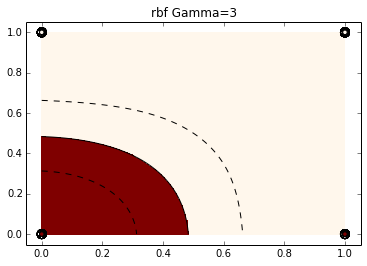

Accuracy Model=70.000


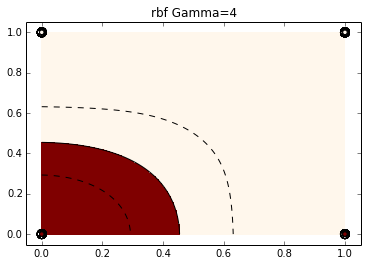

Accuracy Model=70.000


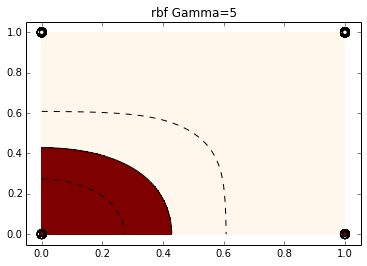

Accuracy Model=70.000


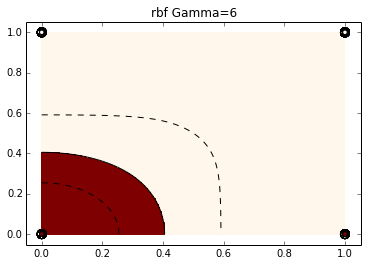

Accuracy Model=70.000


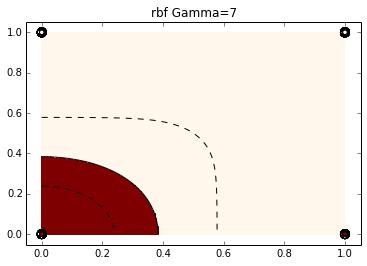

Accuracy Model=70.000


In [133]:
df=pd.read_csv('/Users/z001f64/DataSciences/HomeWork04/train.csv')
formula = 'Survived ~ C(Pclass) + C(Sex)'
feature_1 = 2
feature_2 = 3
featuresList=[feature_1, feature_2]
ReturnSurvivalAccuracy(formula, featuresList, df)

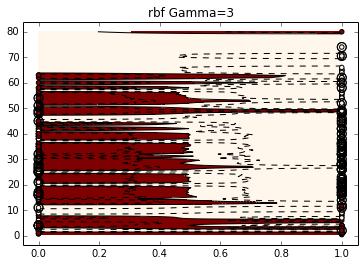

Accuracy Model=76.000


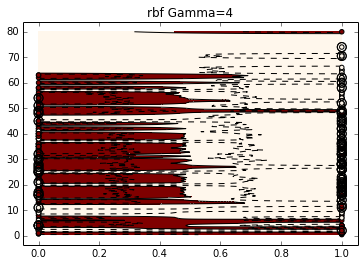

Accuracy Model=76.000


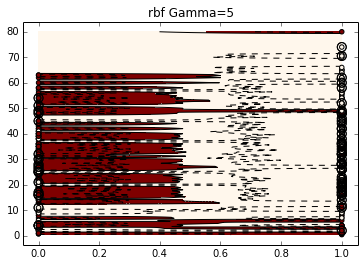

Accuracy Model=76.000


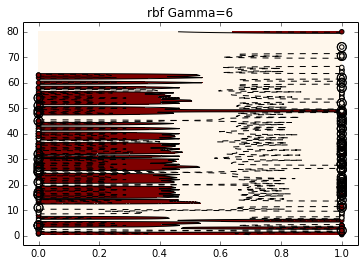

Accuracy Model=76.000


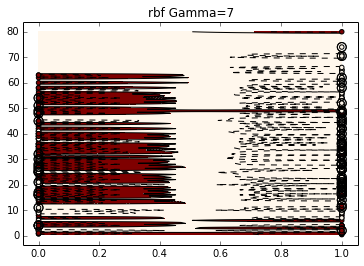

Accuracy Model=75.000


In [134]:
# Apply the fitted model on our 90:10 test model created above
formula = 'Survived ~ C(Pclass) + C(Sex) + Age'
feature_1 = 3
feature_2 = 4
featuresList=[feature_1, feature_2]
ReturnSurvivalAccuracy(formula, featuresList, df)

##### We find accuracy increases with increase in features. 

In [142]:
#Read in the Test DataFrame
formula = 'Survived ~ C(Pclass) + C(Sex)'
feature_1 = 2
feature_2 = 3

test_data=pd.read_csv('/Users/z001f64/DataSciences/HomeWork04/test.csv')
y, x = dmatrices(formula, data=df, return_type='matrix')
X = np.asarray(x)
X=x[:,[feature_1, feature_2]]  
y = np.asarray(y)
# needs to be 1 dimenstional so we flatten. it comes out of dmatirces with a shape. 
y = y.flatten()      
n_sample = len(X)
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)
clfr = svm.SVC(kernel='rbf', gamma=4)
clfr.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=4, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
# Required to fill inorder to prepare the data
test_data['Survived']=2.0

In [144]:
y,x = dmatrices(formula, data=test_data, return_type='dataframe')

In [145]:
x=np.asarray(x)
X=x[:,[feature_1, feature_2]]
survived=clfr.predict(X)
#Create a dataframe to determine Age, Sex and Class of Surviving people
test_data['Survived']=survived
# Return dataframe of Only survived people
dfSurvived=test_data[test_data['Survived']==1]



#### Finally to answer what type of Passengers Survived the Tragedy lets do some EDA on our predicted Survivors

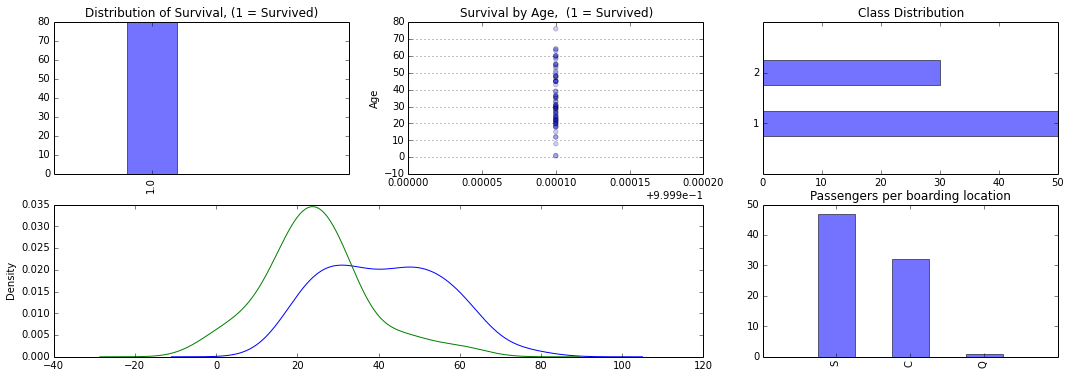

In [150]:
df = dfSurvived
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

try:
    plt.subplot2grid((2,3),(1,0), colspan=2)
    # plots a kernel density estimate of the subset of the 1st class passangers's age
    df.Age[df.Pclass == 1].plot(kind='kde')    
    df.Age[df.Pclass == 2].plot(kind='kde')
    df.Age[df.Pclass == 3].plot(kind='kde')
     # plots an axis lable
    plt.xlabel("Age")    
    plt.title("Age Distribution within classes")
    # sets our legend for our graph.
    plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 
except TypeError:
    pass
ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

 <a name="4.4"></a>
 ## HW4.4 Heritage Healthcare Prize (Predict # Days in Hospital next year)
[Back to Table of Contents](#TOC)

1. Introduction 
Back to Table of Contents

The Heritage Health Prize (HHP) was a data science challenge sponsored by The Heritage Provider Network. It took place from April 4, 2011 to April 4, 2013. For information on the winning entries, please see here.

Please see the following notebooks for more background and candidate solutions


- Spark Map-Reduce + MMLlib solution (with optional extensions) See [Notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/v52cxipe7yftf97/HeritageHealthPrizeUnitTestNotebook_Spark-Map-Reduce.ipynb)

- Spark SQL + MLLib solution (with optional extensions): [Notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/s2wxg6g982oho5m/HeritageHealthPrizeUnitTestNotebook_SQL_FINAL.ipynb)


Please look at section 7 in both notebooks complete any one or more the suggested next steps. E.g.,

* Please complete the EDA extensions using inspiration from the Titanic Notebook from above.
* __Complete Section 3.B: EDA-0. Gather information to see what transformations may need to be done on the data.__
Answer questions about each raw DataFrame. In general, is the data in good shape? For example, in each of the Target DataFrames (df_target_Y1, df_target_Y2, df_target_Y3), what values does DaysInHospital take on? Are they all integers? What values does ClaimsTruncated take on? Are they all integers? In the Claims DataFrame (df_claims), how many different ProviderIDs are there? How many different PrimaryConditionGroups are there? What are their values? What values can the CharlesonIndex take on? Are they integers? In the Drug Count DataFrame (df_drug_count), what values can DrugCount take on? Are they all integers? Given this information, what transformations are needed?

* __Complete Section 3.D: EDA-1. Create tables and graphs to display information about the transformed DataFrames. __
For inspiration, see the Titanic notebook discussed above. Answer questions about each DataFrame. For example, in each of the Target DataFrames (df_target_Y1, df_target_Y2, df_target_Y3), what is the minimum, maximum, mean, and standard deviation of DaysInHospital? In the Claims DataFrame, group by MemberID and Year and count the number of records. What is the minimum, maximum, mean, and standard deviation of the count? Do the same for the Drug Count and Lab Count DataFrames, etc.


* __ Please generate ensemble of DT model using 100 trees with 8 nodes and report the Loss __
Try additional models. See possibilities here (e.g. Decision Tree Regressor, Gradient-Boosted Trees Regressor, Random Forest Regressor). See an example here. Tune their hyperparameters. Try different feature selections. Try a two-step model.
